In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [100]:
feature = pd.read_csv("Raisin_Dataset.csv", index_col = 0)
features = feature
features

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,,,,,,,
87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...
83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni


In [101]:
features['Class']

Area
87524    Kecimen
75166    Kecimen
90856    Kecimen
45928    Kecimen
79408    Kecimen
          ...   
83248      Besni
87350      Besni
99657      Besni
93523      Besni
85609      Besni
Name: Class, Length: 900, dtype: object

In [102]:
features.columns

Index(['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
       'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [103]:
features.keys()

Index(['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
       'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [104]:
features.isna().sum()

MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [105]:
#print(features)

data = features
data['Class'] = data['Class'].replace({'Kecimen': 0, 'Besni': 1})


In [106]:
y=data['Class'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [107]:
X=data.drop('Class',axis=1)


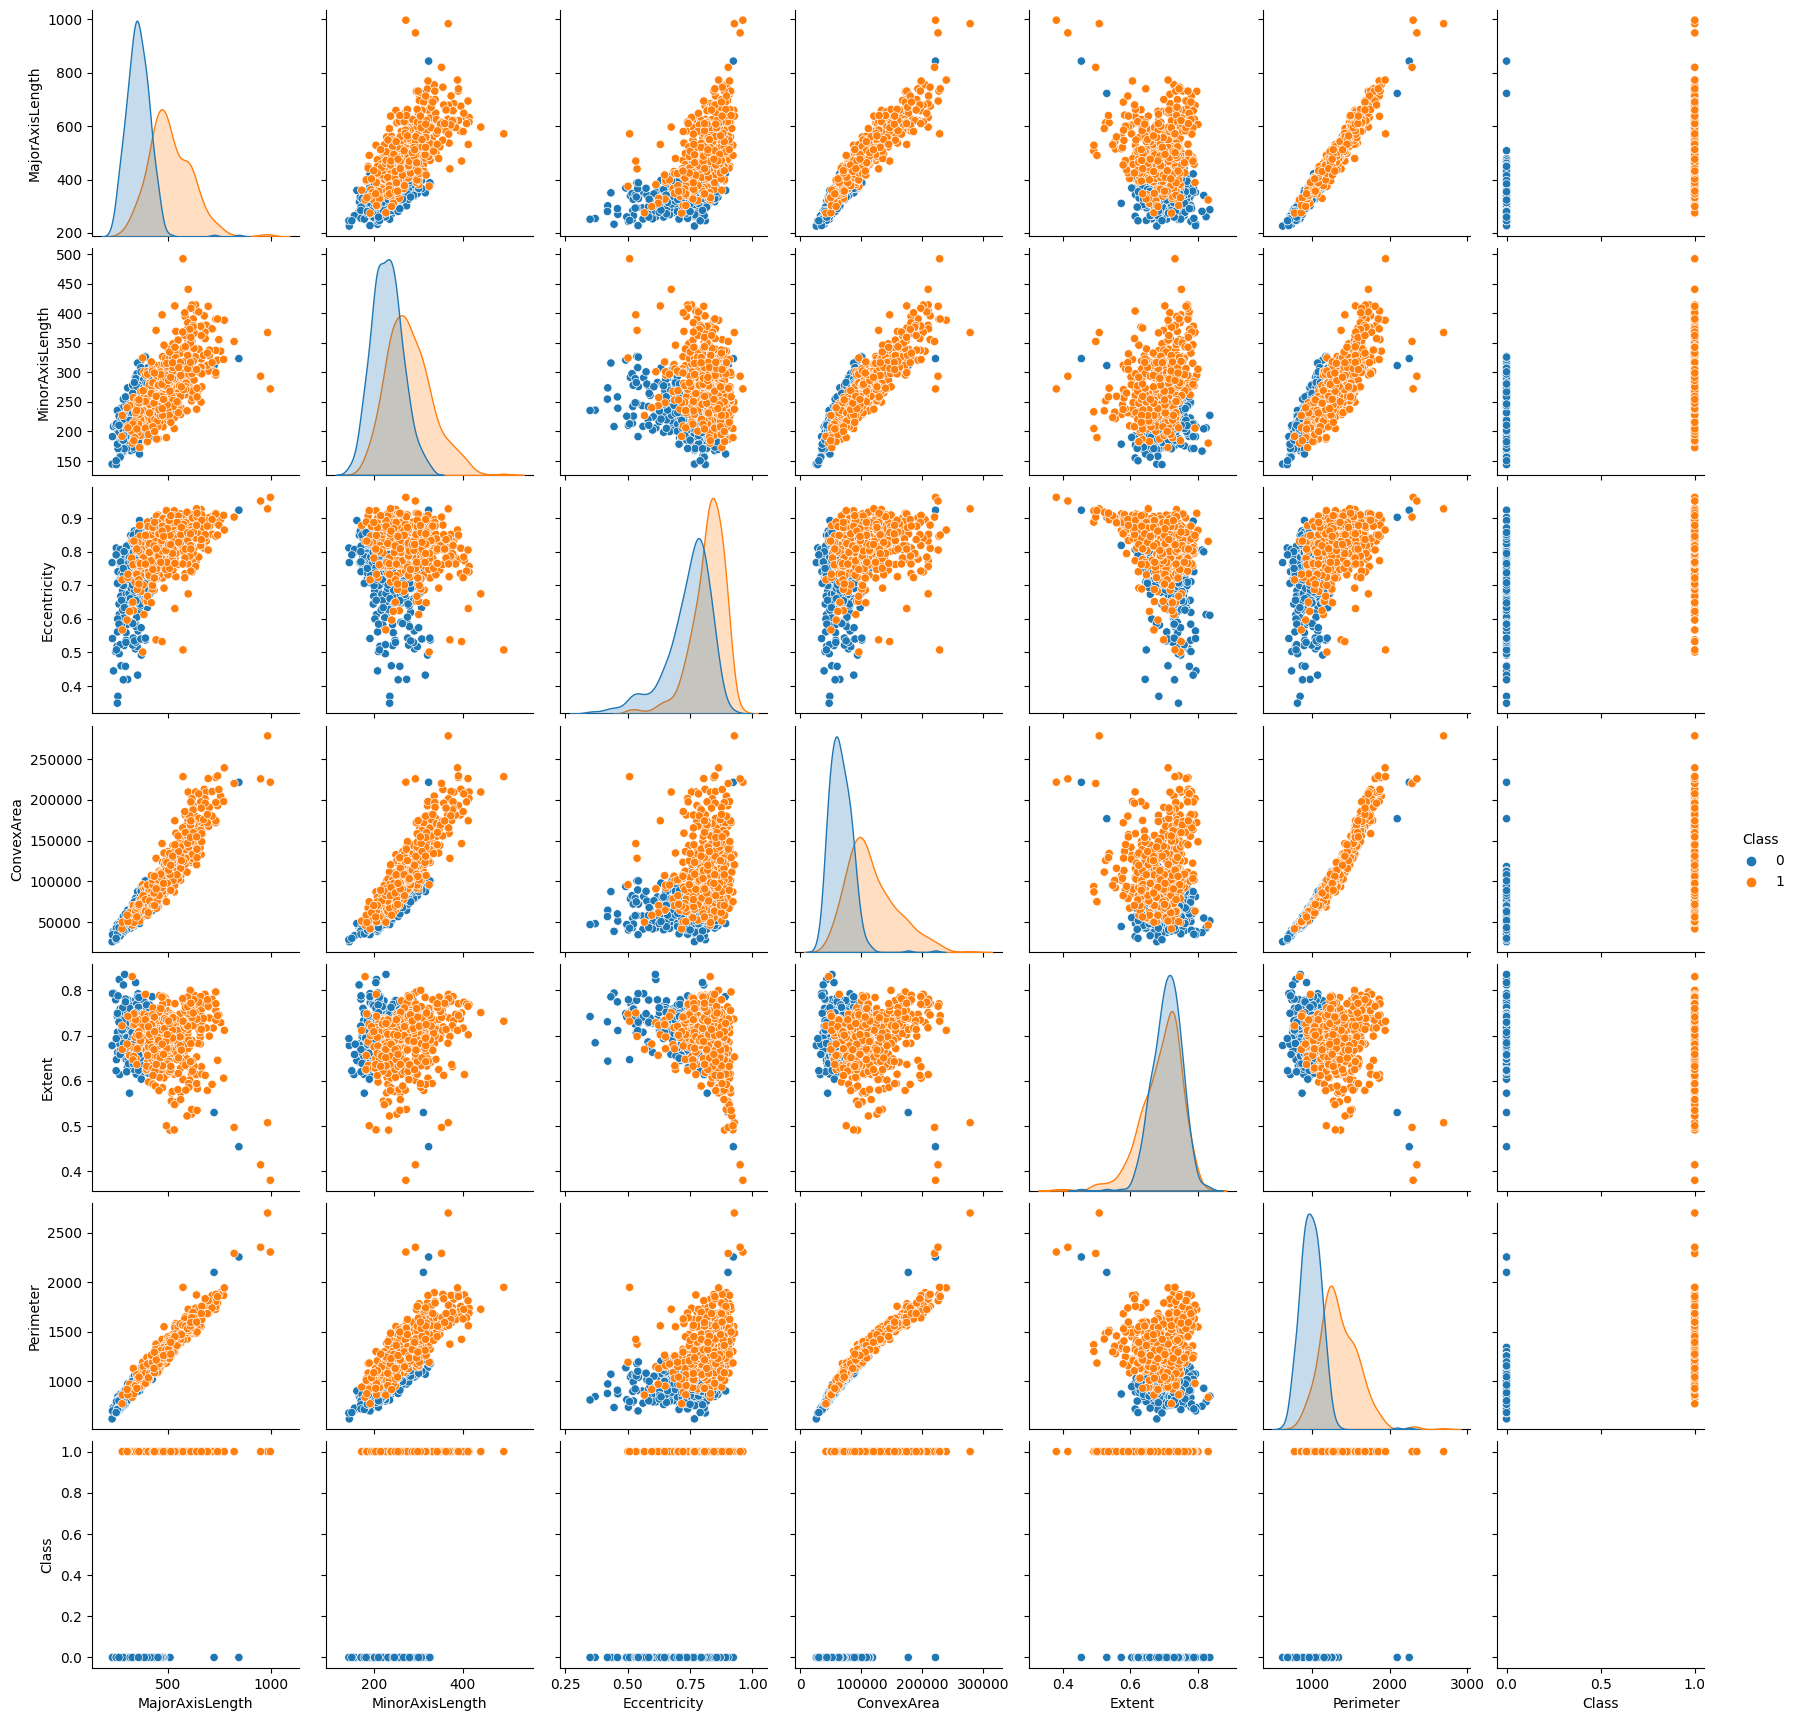

In [108]:
import seaborn as sns

sns.pairplot(data,
             vars=['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
       'Extent', 'Perimeter', 'Class'],
            hue ='Class')
plt.show()

In [122]:
#Splitting the data into training and test test
X = data.iloc[:,0:6].values
y = data.iloc[:,6].values


#Y = pd.get_dummies(y).values
Y=y

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test  = ss.transform(X_test)

In [123]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [124]:
X_train

array([[-0.78812672, -0.38730055, -0.6465287 , -0.65224802,  0.23753637,
        -0.71404437],
       [-1.35563187, -0.54502864, -2.38413446, -1.00956114, -0.58197907,
        -1.13149817],
       [-0.98454723, -0.86018782, -0.37713361, -0.92403154,  0.19911415,
        -0.99769926],
       ...,
       [ 0.10379878, -0.20874035,  0.58570282, -0.04391002, -0.26892835,
         0.28777656],
       [ 0.82730363,  1.88169876, -0.39350244,  1.33404467, -0.11791121,
         1.16198015],
       [ 0.21301716,  0.00791686,  0.51941113,  0.05788717,  0.70180368,
         0.18085058]])

In [125]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [126]:
X_test

array([[ 0.25404955,  0.58980998,  0.04538426,  0.33982546, -0.50100234,
         0.40355155],
       [-0.7118242 , -1.12532793,  0.4733794 , -0.8602087 ,  0.61015172,
        -0.83411273],
       [ 0.21247322,  0.85775103, -0.28798439,  0.44025038,  0.51278193,
         0.35033394],
       ...,
       [ 1.5065259 ,  1.45823802,  0.63922292,  1.55737473, -0.18499717,
         1.48453765],
       [-0.33196457, -0.17067523, -0.02405496, -0.32579841, -0.263055  ,
        -0.36704161],
       [-0.48480495, -0.41656055,  0.01062507, -0.48562997,  0.71929679,
        -0.51084341]])

In [127]:
X_test

array([[ 0.25404955,  0.58980998,  0.04538426,  0.33982546, -0.50100234,
         0.40355155],
       [-0.7118242 , -1.12532793,  0.4733794 , -0.8602087 ,  0.61015172,
        -0.83411273],
       [ 0.21247322,  0.85775103, -0.28798439,  0.44025038,  0.51278193,
         0.35033394],
       ...,
       [ 1.5065259 ,  1.45823802,  0.63922292,  1.55737473, -0.18499717,
         1.48453765],
       [-0.33196457, -0.17067523, -0.02405496, -0.32579841, -0.263055  ,
        -0.36704161],
       [-0.48480495, -0.41656055,  0.01062507, -0.48562997,  0.71929679,
        -0.51084341]])

In [128]:
y_test

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0])

In [143]:

from keras.models import Sequential
from keras.layers import Dense
from tensorflow._api.v2.config import optimizer
from tensorflow import keras
model = Sequential()

model.add(Dense(64,input_shape=(6,),activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(16,activation='relu'))

model.add(Dense(2,activation='relu'))

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer = 'adam')


model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 64)                448       
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 2)                 34        
                                                                 
Total params: 3,090
Trainable params: 3,090
Non-trainable params: 0
_________________________________________________________________


In [144]:
#fitting the model and predicting
from sklearn.utils import validation
# fit network
early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True, mode = "auto")

model_history=model.fit(callbacks = [early_stopping_checkpoint],x=X_train, y=y_train, epochs=1000,validation_data= (X_test,y_test))


Epoch 1/1000
20/23 [=========================>....] - ETA: 0s - loss: 0.7552 - accuracy: 0.6719 

Exception ignored in: <function _xla_gc_callback at 0x7f7d46c1a440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


23/23 [==============================] - 66s 3s/step - loss: 0.7363 - accuracy: 0.6986 - val_loss: 0.4595 - val_accuracy: 0.8889
Epoch 2/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.7109 - accuracy: 0.8611 - val_loss: 0.5835 - val_accuracy: 0.8944
Epoch 3/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5190 - accuracy: 0.8556 - val_loss: 0.5144 - val_accuracy: 0.9056
Epoch 4/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5161 - accuracy: 0.8681 - val_loss: 0.6302 - val_accuracy: 0.8889


In [145]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test)
y_pred_class = np.argmax(y_pred)

6/6 [==============================] - 0s 3ms/step


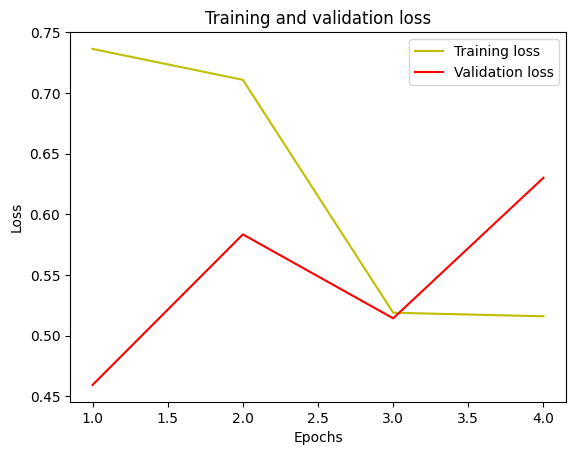

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

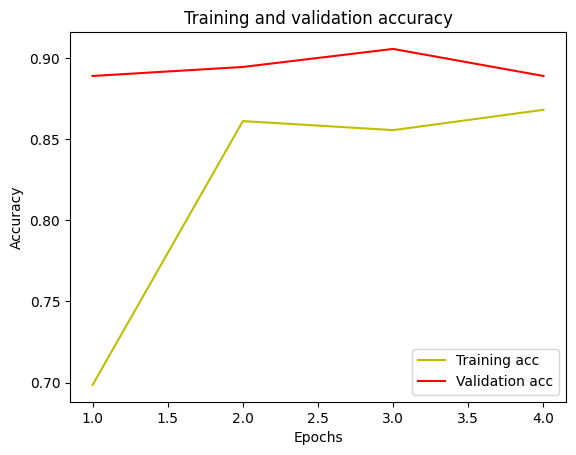

In [147]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()